# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [8]:
n = 5
label_name = "stat6"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [9]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [10]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.4381371140480042
Epoch 1, Loss 1.4394376277923584
Epoch 2, Loss 1.375464379787445
Epoch 3, Loss 1.393019437789917
Epoch 4, Loss 1.4029019474983215
Epoch 5, Loss 1.4331274628639221
Epoch 6, Loss 1.3989930152893066
Epoch 7, Loss 1.3965980410575867
Epoch 8, Loss 1.4096550941467285
Epoch 9, Loss 1.4101819396018982
Epoch 10, Loss 1.4044416546821594
Epoch 11, Loss 1.401092767715454
Epoch 12, Loss 1.4116870164871216
Epoch 13, Loss 1.4550469517707825
Epoch 14, Loss 1.4163082838058472
Epoch 15, Loss 1.4406203031539917
Epoch 16, Loss 1.3968668580055237
Epoch 17, Loss 1.394711196422577
Epoch 18, Loss 1.4036219716072083
Epoch 19, Loss 1.4089033603668213
Epoch 20, Loss 1.3941142559051514
Epoch 21, Loss 1.4080414175987244
Epoch 22, Loss 1.4158691763877869
Epoch 23, Loss 1.4339475631713867
Epoch 24, Loss 1.3874703645706177
Epoch 25, Loss 1.4028002619743347
Epoch 26, Loss 1.4012947082519531
Epoch 27, Loss 1.4080677032470703
Epoch 28, Loss 1.4067285656929016
Epoch 29, Loss 1.41585880517

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

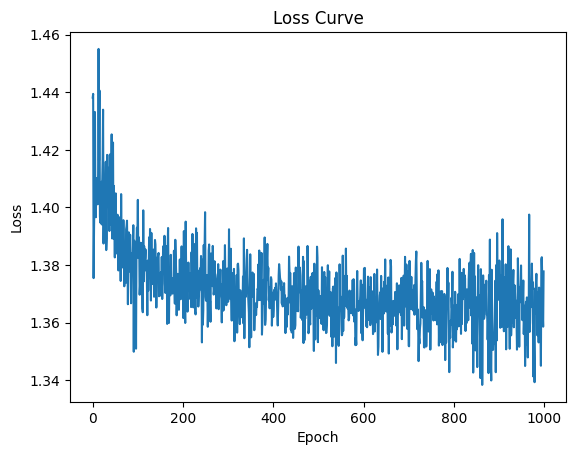

In [11]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 0.0%
Accuracy for class 1 = 40.0%
Overall accuracy = 16.666666666666668%
Accuracy for class 0 = 47.82608695652174%
Accuracy for class 1 = 64.0%
Overall accuracy = 56.25%


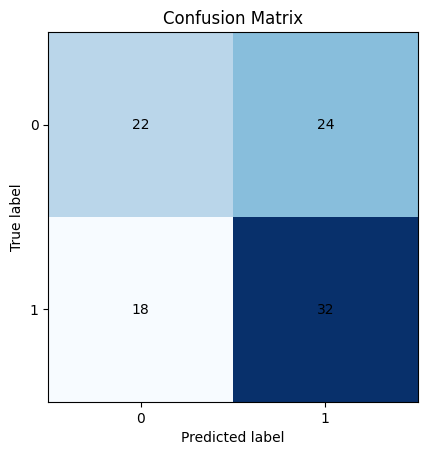

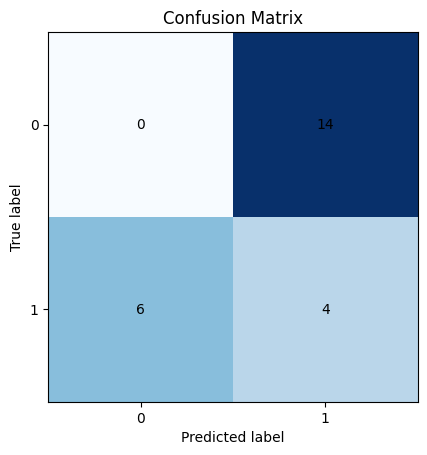

In [12]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

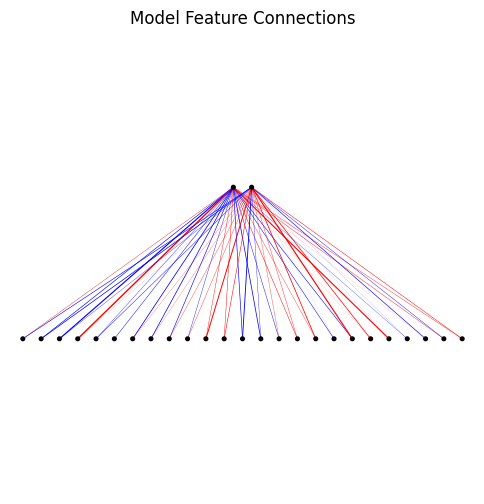

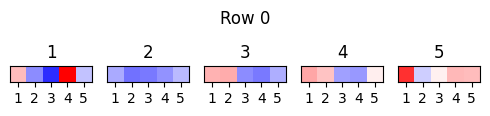

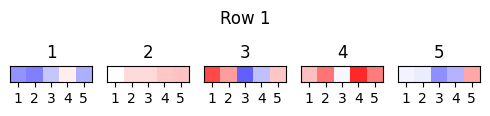

In [13]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)